#Iniziamo il laboratorio!

Vediamo da vicino cosa e' il **Machine Learning** con questo semplice esercizio.
Per fare questo scriveremo un programma. 
Il codice che scriveremo, pero', non avra' lo scopo di definire in forma di **source code** le regole in base alle quali rispondere a degli input. 

Al contrario il codice che scriveremo avra' lo scopo di imparare dai dati, rappresentazione du'esperienza passata, come  rispondere agli input futuri. Il nostro codice sara' focalizzato sugli aspetti di lettura dati, sulla comprensione di quali parametri siano rilevanti per il problema e di quale sia il modello matematico migliore per effettuare apprendimento o meglio il training del programma.

Il caso che esaminiamo e' reale e fa parte della letteratura: nel 1990 un professore di economia mette a punto un modello capace di predire la qualita', e quindi il prezzo, delle bottiglie di vino Bordeaux. Il modello prende in considerazione parametri legati alle condizioni meteo nel periodo di maturazione dei vigneti e durante la vendemmia. Il risultato e' un modello in grado di dire se da una vendemmia potra' nascere un vino d'annata capace di apprezzarsi con l'invecchiamento.

Il metodo che viene usato si chiama Regressione Lineare e predice i valori che puo' assumere una variabile dipendente a partire dai valori che assume un set di varaibili indipendenti.

* una variabile del dataset viene considerata dipendente, o target ,e sara' proprio questa variabile che il modello dovra' predire
* un set di variabili saranno indipendenti e satanno usate per determinare il valore della variabile dipendente 

Il nostro dataset di training si chiama wine.csv. 

Porta il file wine.csv su object storage parendo la sezione dati: puoi fare drag and drop oppure fai upload con browse. Troverai il file wine.csv anche nella sezione data asset.

* Posizionati con il cursore nella cella sottostante

* Apri il menu a fianco del file e scegli Insert to code e poi Insert R DataFrame.

Verranno generate in automatico le chiamate REST per agganciare Cloud Object Storage con le tue credenziali.

Viene poi preparata la  call per la lettura del file.

* Dove compare **df.data.1** edita un nome piu' parlante per il dataset.

* Cambia  df.data.1 con wine:
   ** wine <- read.csv(text = rawToChar(obj$content))**
   
   ** head(wine) **

* Con **CTLR-ENTER** esegui il codice contenuto nella cella.

* Con **head(wine)** puoi vedere le prime righe del dataset e la riga di intestazione.

Questo link contiene un paper del Prof. Ashenfelter che ha avuto l'idea di predire la qualita' del vino a partire dai prezzi d'asta


<a href="http://media.terry.uga.edu/documents/economics/ashenfelter_predicting_quality.pdf" target="_blank" rel="noopener noreferrer">Predicting the Quality and Prices of Bordeaux Wines</a>.



In [1]:
# The code was removed by DSX for sharing.

Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1952,7.4950,600,17.1167,160,31,43183.57
1953,8.0393,690,16.7333,80,30,43495.03
1955,7.6858,502,17.1500,130,28,44217.86
1957,6.9845,420,16.1333,110,26,45152.25
1958,6.7772,582,16.4167,187,25,45653.81
1959,8.0757,485,17.4833,187,24,46128.64


*****************************************************************************************************************************
In un progetto di DataScience la parte piu' importante e anche piu' impegnativa e' rappresentata dalla esplorazione dei dati attraverso lo studio dei dataset e di conseguenza della loro cleaning o pulizia.

Usando il linguaggio R ci sono molti comandi che ci aiutano a esplorare e conoscere il nostro dataset.

Con **str(wine)** possiamo vedere quante righe sono presenti nel file, quante variabili abbiamo, il loro nome e il loro tipo

Con **summary(wine)** per ogni variabile abbiamo un sommario dei valori statistici rilevanti come media, mediana. 

Con summary vediamo anche il conto degli NA per ogni attributo.

In [2]:
str(wine)

'data.frame':	28 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


In [3]:
summary(wine)

      Year          Price         WinterRain         AGST        HarvestRain   
 Min.   :1952   Min.   :6.205   Min.   :376.0   Min.   :14.98   Min.   : 38.0  
 1st Qu.:1961   1st Qu.:6.514   1st Qu.:547.2   1st Qu.:16.16   1st Qu.: 88.5  
 Median :1968   Median :7.053   Median :591.0   Median :16.48   Median :126.5  
 Mean   :1967   Mean   :7.051   Mean   :607.1   Mean   :16.49   Mean   :145.8  
 3rd Qu.:1974   3rd Qu.:7.415   3rd Qu.:701.2   3rd Qu.:16.98   3rd Qu.:184.8  
 Max.   :1981   Max.   :8.494   Max.   :830.0   Max.   :17.65   Max.   :292.0  
      Age          FrancePop    
 Min.   : 3.00   Min.   :43184  
 1st Qu.: 8.75   1st Qu.:46992  
 Median :15.50   Median :50842  
 Mean   :15.89   Mean   :50224  
 3rd Qu.:22.25   3rd Qu.:53756  
 Max.   :31.00   Max.   :55110  

Abbiamo gli attributi associati alle bottiglie di vino e poi abbiamo il prezzo di aggiudicazione d'asta della bottiglia.

* Per il momento consideriamo una sola variabile e proviamo a vedere come e' collegata al prezzo di aggiudicazione del vino.

  La variabile che usiamo e' **AGST** un acronimo che sta per **Average Growth Season Temperature** si tratta cioe' della temperatura media nella fase di maturazione dell'uva.

  Facciamo un grafico che rappresenta il price nelle ordinate e AGST nelle ascisse.



  


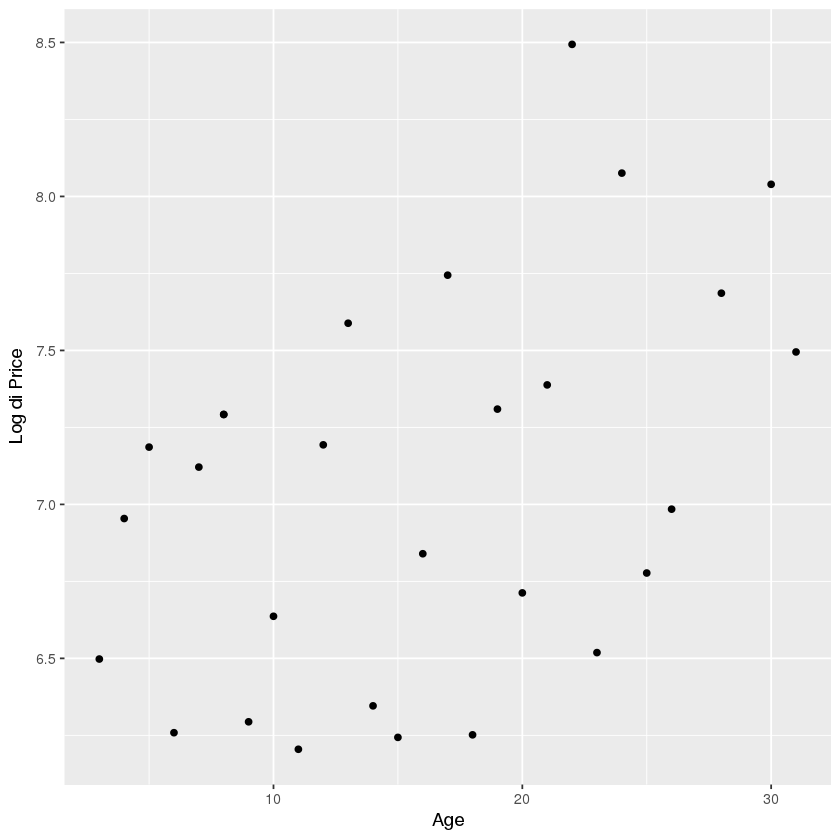

In [4]:
library(ggplot2)
#pc1=ggplot(wine,aes(x=AGST,y=(log di)Price))
pc1=ggplot(wine,aes(x=Age,y=Price))
pc1=pc1+geom_point()+ylab("Log di Price")
pc1


* Come secondo step togliamo il carattere # di commento e rappresentiamo il valore medio del prezzo. 
  Il valore medio e' un valore costante che rappresentera' il nostro numero di riferimento. 
  Il nostro modello dovra' portare un miglioramento rispetto a questa una stima media del prezzo.

[1] 7.050879

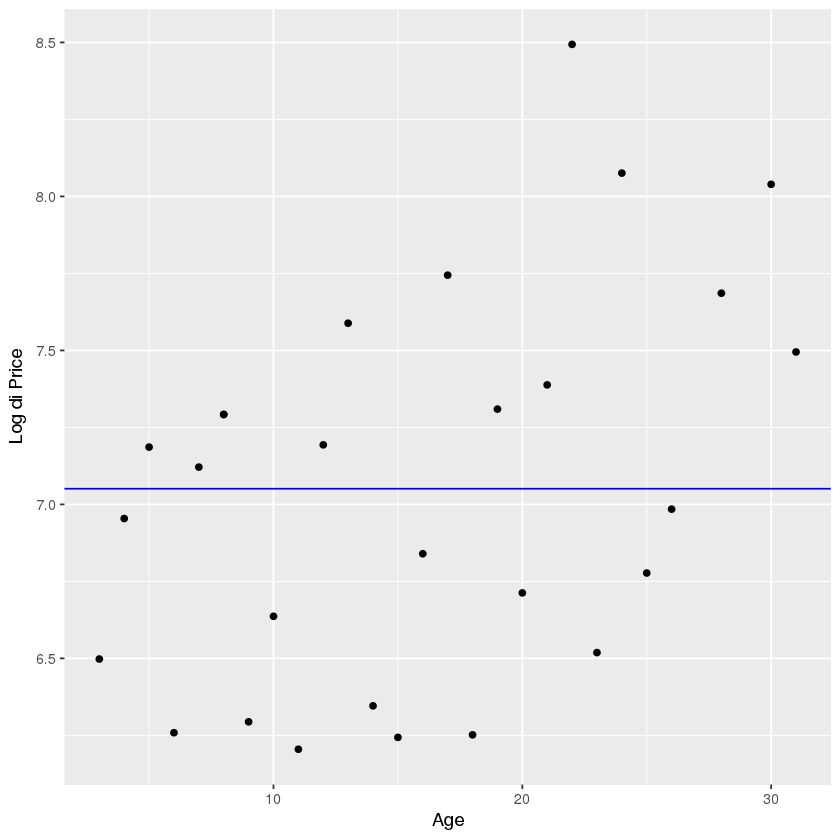

In [5]:
media=sum(wine$Price)/28.0

pc1+geom_hline(yintercept=media, color = "blue") + ylab("Log di Price")
media

In [6]:
distanza_da_media=sum((wine$Price-media)^2)
distanza_da_media


[1] 10.53061

*****************************************************************************************************************************
Valutare il prezzo usando semplicemente la media e' molto approssimativo e comunque costituira' il valore di riferimento rispetto al quale dovremo migliorare.

Si intuisce che una retta probabilmente sarebbe una soluzione migliore e punto per punto seguirebbe meglio andamento dei valori reali.

Esegui la cella sottostante dove viene rapidamente generata e disegnata una retta che rappresenta il prezzo in funzione della sola variabile AGST.

* La retta che vedrai rappresenta un modello di **Regressione Lineare** che rappresenta l'andamento del prezzo in funzione di AGST.


* La variabile indipente viene detta che **label** o **target** : e' quanto il codice machine learning  deve imparare a predire.




In questo primo grafico, il modello rappresenta.

Y=β0 + β1x1 
dove x1 corrisponde ad Age.

In breve il risultato del modello sara determinare i valori di β0 e β1

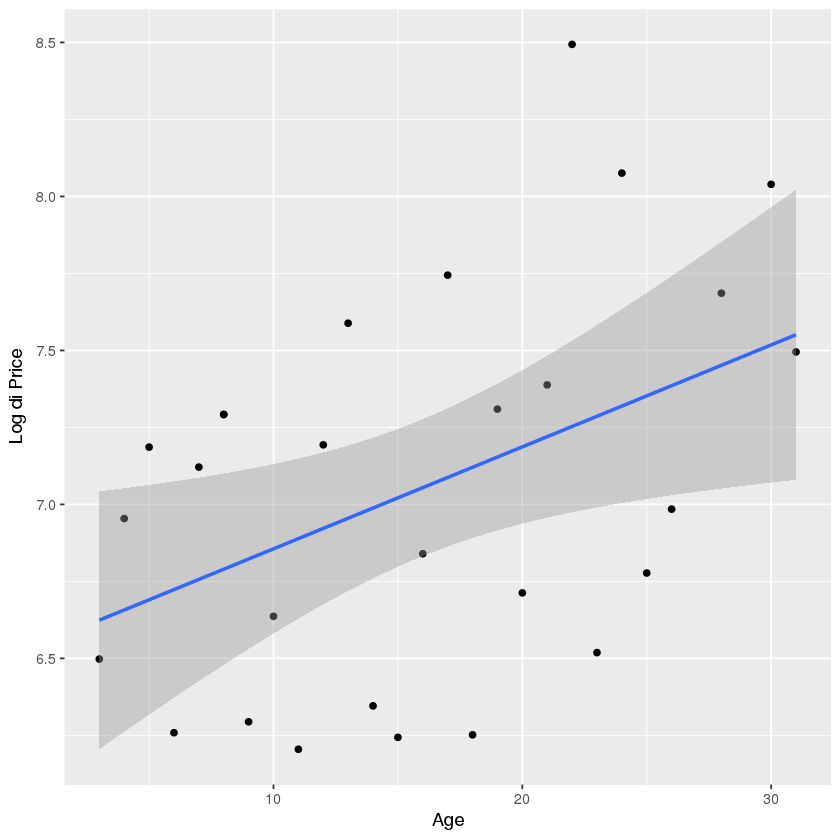

In [7]:
pc1=ggplot(wine,aes(x=Age,y=Price))
pc1+geom_point()+ geom_smooth(method = "lm")+ylab("Log di Price")

La retta che abbiamo disegnato e' un modello di Regressione Lineare che e' stata eseguita direttamente mentre veniva eseguito il grafico dei punti.

In realta' abbiamo altre variabili oltre ad Age.

La lista delle variabili che descrive le caratteristiche del vino e' la seguente:

* ** AGST = Temperatura media nel periodo di maturazione (Aprile-Settembre) misurata in gradi centigradi**

* ** Harvest Rain = Piogge nel periodo tra Agosto e Settembre misurate in ml**

* ** Winter Rain = Piogge Invernali tra Ottobre e Marzo misurate in ml**

* ** Age of Wine = Invecchiamento espresso in anni **

* ** Population of France = Popolazione in Francia nello stesso anno **

Crea un modello di regressione lineare che collega il prezzo del vino ad AGST cioe' alla temperatura media nel periodo di maturazione.

Chiama questo modello model1



In [8]:
modello1=lm( Price ~ AGST, data=wine )

In [9]:
summary(modello1)


Call:
lm(formula = Price ~ AGST, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78058 -0.23602 -0.03771  0.25927  0.90566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.5140     2.2993  -1.528    0.139    
AGST          0.6405     0.1393   4.598  9.7e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4726 on 26 degrees of freedom
Multiple R-squared:  0.4485,	Adjusted R-squared:  0.4273 
F-statistic: 21.14 on 1 and 26 DF,  p-value: 9.705e-05


*****************************************************************************************************************************
Esamina il risultato del modello.

* Per prima cosa vediamo la funzione che abbiamo utilizzato per creare il modello: Price in funzione di AGST
  Nella riga sottostante abbiamo il sommario degli errori

* Di seguito abbiamo i coefficenti che abbiamo ottenuto.

* La colonna **ESTIMATE** rappresenta i valori dei coefficienti della retta che vogliamo scoprire:

* **Intercept** corrisponde a **β0**, mentre **AGST** corrisponde a **β1**

* Il valore **multiple R-squared** e' legato all'errore del nostro modello rispetto al modello di riferimento che e' la media.

  Idealmente se il nostro modello fosse perfetto R-squared sarebbe uguale ad 1.

  Se il invece il nostro modello non introduce migliorie rispetto al semplice calcolo della media, R-squared risulta uguale a zero.

Il modello quindi produce: Y=β0 + β1x1 + εi
dove εi e' l'errore associato all'i-simo dato di input. Quindi per ogni dato in input il modello non riesce a dare esattamente il valore rilevato per Y, ma il modello dara' y + un errore rappresentato da ε.
Il modello sara' buono se la somma di tutti gli ε sara' piccolo idealmente tendente a zero.
ε e' anche detto **residual**.

Come prova andiamo a calcolare gli errori del modello appena ottenuto.

Per vedere gli errori del modello per ogni dato esegui la cella seguente.


In [10]:
modello1$residuals

1           2           3           4           5           6 
 0.04569481  0.83556332  0.21516609  0.16506457 -0.22375372  0.39158674 
          7           8           9          10          11          12 
-0.48215372  0.90566206  0.46179287  0.16009775 -0.23598050 -0.07662652 
         13          14          15          16          17          18 
 0.66866374 -0.04368564 -0.61865692 -0.74043265  0.42722076 -0.03172945 
         19          20          21          22          23          24 
 0.12204198 -0.78058008 -0.63210713 -0.05053349 -0.66978496 -0.20845927 
         25          26          27          28 
 0.56934754  0.11327180 -0.23615650 -0.05053349

In [11]:
distanza_da_modello=sum((modello1$residuals)^2)
distanza_da_modello

[1] 5.807552

*****************************************************************************************************************************
Proviamo ora ad aggiungere un'altra variabile al modello. 

Prendiamo HarvestRain.
In questo caso la curva sara': Y=β0 + β1x1 + β2x2 + εi
dove x1=AGST e x2= HarvestRain

Creiamo un nuovo modello che chiamiamo model2


In [12]:
modello2=lm( Price ~ AGST+HarvestRain, data=wine )
summary(modello2)


Call:
lm(formula = Price ~ AGST + HarvestRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87239 -0.18725  0.06019  0.16866  0.57446 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.7625565  1.7764932  -1.555 0.132501    
AGST         0.6324043  0.1071273   5.903 3.68e-06 ***
HarvestRain -0.0042391  0.0009733  -4.355 0.000198 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3634 on 25 degrees of freedom
Multiple R-squared:  0.6864,	Adjusted R-squared:  0.6613 
F-statistic: 27.36 on 2 and 25 DF,  p-value: 5.061e-07


*****************************************************************************************************************************
Guardiamo ora il summary di model2.

Compare un terzo coefficente che corrisponde al parametro da associare ad HarvestRain.

In particolare notate che il coefficiente di HarvestRain e' negativo.

Guardando R-squared vediamo che il valore si e' alzato. 
Aggiungendo variabili, il valore di R-squared incrementa. Non sempre pero' la variabile che aggiungiamo serve al modello.

In questo caso l'aggiunta della nuova variabile ha migliorato il modello. Se andiamo a calcolare l'errore troveremo un valore piu' basso.


In [13]:
distanza_da_modello2=sum((modello2$residuals)^2)
distanza_da_modello2

[1] 3.302109

*****************************************************************************************************************************
Cosa accade se costruiamo un modello con tutte le nostre variabili indipendenti?

Costruiamo un modello che chiameremo model3 usando tutte le varibili.

In [15]:
modello3=lm( Price ~ AGST+HarvestRain+WinterRain+Age, data=wine )
summary(modello3)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain + Age, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46944 -0.24184  0.01958  0.19792  0.51800 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.9342658  1.6616938  -2.368  0.02669 *  
AGST         0.6346764  0.0932391   6.807 6.09e-07 ***
HarvestRain -0.0037889  0.0008035  -4.716 9.46e-05 ***
WinterRain   0.0011799  0.0004814   2.451  0.02227 *  
Age          0.0221672  0.0069516   3.189  0.00409 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2862 on 23 degrees of freedom
Multiple R-squared:  0.821,	Adjusted R-squared:  0.7899 
F-statistic: 26.38 on 4 and 23 DF,  p-value: 2.662e-08


*****************************************************************************************************************************
Esaminiamo il summary di modello3.

Adesso abbiamo 6 coefficenti: intercept cioe' β0  e un termine per ciascuna delle variabili indipendenti.

Se esaminiamo R-squared troviamo che il valore e' migliorato e se calcoliamo la somma dei residual troveremo un valore piu' basso del precedente.

Ma dobbiamo usare tutte le variabili?

Esaminiamo piu attentamente il summary di model3.

Le variabili indipendenti sono nella lista a sinistra. Estimate corrisponde ai valori dei coefficienti per ciascuna variabile piu' il termine noto o beta0.

Le altre colonne ci aiutano a capire se il coefficiente della variabile e' diverso da zero e se la variabile deve essere inclusa nel modello.

Se il valore del coefficiente di una variabile non e' sensibilmente diverso da zero, questo significa che la variabile stessa non ha influenza sul modello.


Summary mi da anche un indicazione visiva delle variabili significative per il modello. Questa indicazione e' rappresentata dagli asterischi del summary.

Le variabili che non presentano asterischi non sono da ritenersi significative per il modello. le variabili con tre asterischi sono invece quelle piu' significative.


La curva di modello3e' la seguente: Y=β0 + β1x1 + β2x2 + β3x3 + β4x4 + εi

dove x1=AGST e x2= HarvestRain x3=WinterRain x4=Age



Se avessimo usato solo la variabile Age cosa avremmo ottenuto?

Crea un modello di price che usa solo AGE

Quanto ve R2 del modello?

Calcola il valore di R2 a partire dai residual del modello. Ricorda che R2 e' riferito all'errore commesso nel modello basico di riferimento



In [16]:
#modello4=**scrivi il tuo codice qui ** lm( Price ~ Age, data=wine )
#  **scrivi il tuo codice qui **
# calcolo manuale di R2 dai residual del modello4
#  mioR2=** scrivi qui il tuo codice **  1-sum(modello4$residuals^2)/distanza_da_media
mioR2

ERROR: Error in eval(expr, envir, enclos): object 'mioR2' not found


*****************************************************************************************************************************

Se avessimo rimosso la variabile Age  cosa avremmo ottenuto?

Creiamo un modello4 che non contiene questa variabile.



Quale e' la variabile meno significativa del modello?



In [17]:
modello5=lm( Price ~ AGST+HarvestRain+WinterRain, data=wine )
summary(modello5)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62764 -0.16881  0.03707  0.20387  0.62405 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.9882311  1.9144383  -2.606   0.0155 *  
AGST         0.7145880  0.1055777   6.768 5.32e-07 ***
HarvestRain -0.0036134  0.0009423  -3.835   0.0008 ***
WinterRain   0.0012829  0.0005647   2.272   0.0323 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3365 on 24 degrees of freedom
Multiple R-squared:  0.7419,	Adjusted R-squared:  0.7097 
F-statistic:    23 on 3 and 24 DF,  p-value: 3.068e-07


Guardando il summary si vedono le variabili tutte significative ma R-quared e' sceso notevolmente.
Scegliamo il model4 e verifichiamo la capacita' del modello di predire il prezzo del vino usando un file di test.


In [18]:

obj <- s3HTTP(
    verb = "GET",
    bucket = bucket,
    headers = headers,
    path = "winetest.csv",
    key = Sys.getenv("AWS_ACCESS_KEY_ID"),
    secret = Sys.getenv("AWS_SECRET_ACCESS_KEY"),
    check_region = FALSE,
    base_url = url)


winetest <- read.csv(text = rawToChar(obj$content))
head(winetest)

Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1982,6.7541,700,16.15,122,4,53835.83
1983,6.5100,643,15.80,51,4,53835.83
1984,7.7400,620,16.68,85,12,52835.83


In [19]:
predictTest=predict(modello3,newdata=winetest)
predictTest

1        2        3 
6.768097 6.747720 7.327612